# 02. MultipleParameterTutorial

In [01.BasicTutorial](https://github.com/hyperopt/hyperopt/blob/master/tutorial/01.BasicTutorial.ipynb), you learned about optimizing a single HyperParameter function. At MultipleParameterTurial, you learn the following things.

* Optimize the Objective Function with Multiple HyperParameters
* Define various search space

In [1]:
# Import HyperOpt Library
from hyperopt import tpe, hp, fmin
import numpy as np

Declares a purpose function to optimize. Unlike last time, we will optimize the function with two Hyperparameters, $x_1$ and $x_2$.

$$ y = sin\sqrt{x_{1}^2 + x_{2}^2} $$

In [2]:
def objective(params):
    x1, x2 = params['x1'], params['x2']
    return np.sin(np.sqrt(x1**2 + x2**2))

Just like last time, let's try visualizing it. But unlike last time, there are two Hyperparameters, so we need to visualize them in 3D space.

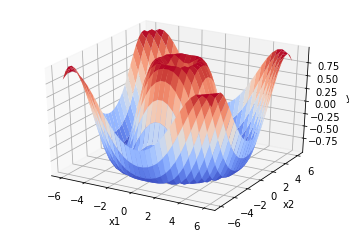

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)
x1, x2 = np.meshgrid(x1, x2)

y = objective({'x1': x1, 'x2': x2})

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, y, cmap=cm.coolwarm)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

Likewise, let's define the search space. However, this time, you need to define two search spaces($x_1, x_2$), so you put each of them in the `dict()`.

In [4]:
space = {
    'x1': hp.uniform('x1', -6, 6),
    'x2': hp.uniform('x2', -6, 6)
}

Perfect! Now you can do exactly what you did at BasicTutorial!

In [5]:
best = fmin(
    fn=objective, # Objective Function to optimize
    space=space, # Hyperparameter's Search Space
    algo=tpe.suggest, # Optimization algorithm (representative TPE)
    max_evals=1000 # Number of optimization attempts
)
print(best)

100%|██████████| 1000/1000 [00:07<00:00, 126.55trial/s, best loss: -0.9999996983883422]
{'x1': 4.694816572472784, 'x2': -0.4154850678722318}


## Using various search spaces 

`hp.randint(label, upper)` searches the integer in the [0, upper) interval.

In [6]:
f = lambda x: -x

best = fmin(
    fn=f,
    space=hp.randint('x', 5),
    algo=tpe.suggest,
    max_evals=10
)
print(best)

100%|██████████| 10/10 [00:00<00:00, 873.67trial/s, best loss: -4.0]
{'x': 4}


`hp.choice(label, list)` searches for elements in the list.

In [7]:
def f(x):
    if x == 'james':
        return 0
    if x == 'max':
        return 1
    if x == 'wansoo':
        return 2

best = fmin(
    fn=f,
    space=hp.choice('x', ['james', 'max', 'wansoo']),
    algo=tpe.suggest,
    max_evals=10
)
print(best)

100%|██████████| 10/10 [00:00<00:00, 754.89trial/s, best loss: 0.0]
{'x': 0}
